In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4>The data is saved as customer_churn.csv. 
Fields and their definitions:</h4>

Name : Name of the latest contact at Company

Age: Customer Age

Total_Purchase: Total Ads Purchased

Account_Manager: Binary 0=No manager, 1= Account manager assigned

Years: Totaly Years as a customer

Num_sites: Number of websites that use the service.

Onboard_date: Date that the name of the latest contact was onboarded

Location: Client HQ Address

Company: Name of Client Company

In [122]:
df = pd.read_csv("/Users/victoria/Desktop/Coding Data/DataSets/customer_churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [123]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


<h2> Data Wrangling </h2>

In [124]:
# Convert the 'Onboard_date' column to a datetime object
df['Onboard_date'] = pd.to_datetime(df['Onboard_date'])

# Drop the time component from the 'Date' column
df['Onboard_date'] = df['Onboard_date'].dt.date

df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [125]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [126]:
# Extract state abrevations from location column and create column 'State'
df['State'] = df['Location'].str.extract(r'([A-Z]{2})')

# Check the new column for null values
df['State'].describe()

count     900
unique     62
top        DP
freq       40
Name: State, dtype: object

<h2> EDA </h2>

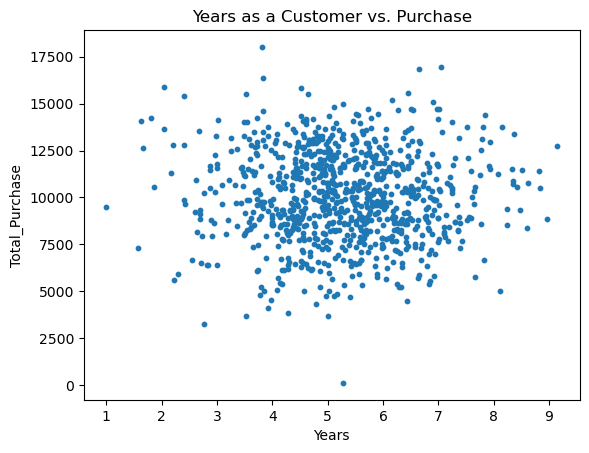

In [127]:
# Plot comparing number of years as a customer vs. total purchase
outliers = plt.scatter(df['Years'], df['Total_Purchase'], s=10)

# set the labels and title
plt.xlabel('Years')
plt.ylabel('Total_Purchase')
plt.title('Years as a Customer vs. Purchase')

# display the plot
plt.show(outliers)

In [128]:
# Calculate the 10th and 90th percentiles of the data
q10 = df['Total_Purchase'].quantile(0.1)
q95 = df['Total_Purchase'].quantile(0.95)

# Filter the data to remove above specified outliers
df = df[(df['Total_Purchase'] >= q10) & (df['Total_Purchase'] <= q95)]

df.describe()


,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,41.749020,10293.779386,0.479739,5.319163,8.577778,0.168627
std,6.187707,1761.826284,0.499916,1.258594,1.790252,0.374667
min,22.000000,6857.290000,0.000000,1.000000,3.000000,0.000000
25%,37.000000,8840.510000,0.000000,4.500000,7.000000,0.000000
50%,42.000000,10268.870000,0.000000,5.260000,9.000000,0.000000
75%,46.000000,11670.730000,1.000000,6.130000,10.000000,0.000000
max,65.000000,13762.790000,1.000000,9.150000,14.000000,1.000000


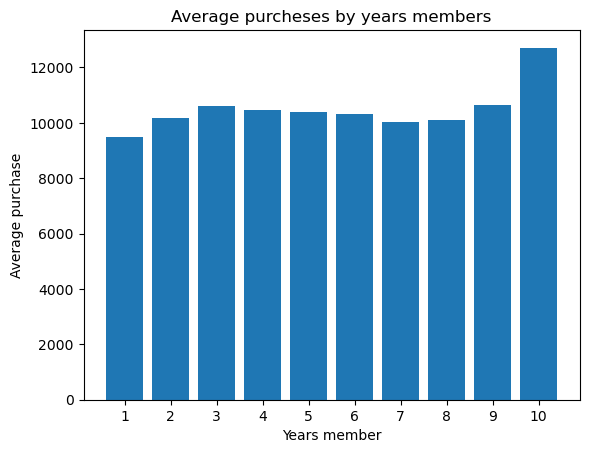

In [129]:
# Round up Years values to a whole number

df['Years'] = np.ceil(df['Years'])

# Which customers on averagne have the highest Total_Purchese?
most_purchases = df.groupby(['Years'])['Total_Purchase'].mean()

avg_purchese = plt.bar(most_purchases.index, most_purchases.values)

# Adding plot labels and title
plt.xlabel('Years member')
plt.ylabel('Average purchase')
plt.title('Average purcheses by years members')

plt.xticks(most_purchases.index)
plt.show(avg_purchese)

In [130]:
# Sum of customers per member years

longterm_member = df['Years'].value_counts()
longterm_member

6.0     239
5.0     208
7.0     146
4.0      77
8.0      48
3.0      26
9.0      16
2.0       3
10.0      1
1.0       1
Name: Years, dtype: int64

<h3> Deeper analysis of churned vs. retained customers </h3>

In [133]:
# How many customers have churned?
value_counts = df['Churn'].value_counts()
value_counts

0    636
1    129
Name: Churn, dtype: int64

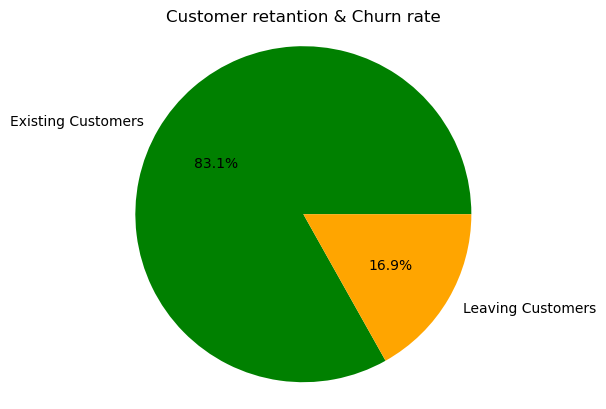

In [165]:
# Vizualization of customer retation in %
labels = ['Existing Customers', 'Leaving Customers']
colors = ['green', 'orange']
churn_count = plt.pie(value_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Customer retantion & Churn rate')
plt.show(churn_count)


In [151]:
# Create df subsets
existing_customers = df[df['Churn'] == 0]
leaving_customers = df[df['Churn'] == 1]

existing_customers.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.0
mean,41.545597,10287.430802,0.463836,5.672956,8.141509,0.0
std,6.144414,1771.510920,0.499083,1.287110,1.529379,0.0
min,22.000000,6857.290000,0.000000,1.000000,3.000000,0.0
25%,37.000000,8879.867500,0.000000,5.000000,7.000000,0.0
50%,41.000000,10231.690000,0.000000,6.000000,8.000000,0.0
75%,46.000000,11671.577500,1.000000,6.000000,9.000000,0.0
max,65.000000,13762.790000,1.000000,10.000000,14.000000,0.0


In [150]:
leaving_customers.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.0
mean,42.751938,10325.079380,0.558140,6.348837,10.728682,1.0
std,6.325829,1719.690598,0.498544,1.203193,1.384918,0.0
min,26.000000,6992.090000,0.000000,3.000000,7.000000,1.0
25%,38.000000,8736.060000,0.000000,6.000000,10.000000,1.0
50%,43.000000,10367.080000,1.000000,6.000000,11.000000,1.0
75%,46.000000,11628.100000,1.000000,7.000000,12.000000,1.0
max,58.000000,13743.270000,1.000000,9.000000,14.000000,1.0


In [158]:
# Percentage of existing customers' accounts being managed
ac_ec = round(existing_customers[existing_customers['Account_Manager'] == 1].count() / existing_customers['Account_Manager'].count() * 100, 2)
print(ac_ec['Account_Manager'], '%')


46.38 %


In [159]:
# Percentage of leaving customers' accounts being managed
ac_lc = round(leaving_customers[leaving_customers['Account_Manager'] == 1].count() / leaving_customers['Account_Manager'].count() * 100, 2)
print(ac_lc['Account_Manager'], '%')


55.81 %


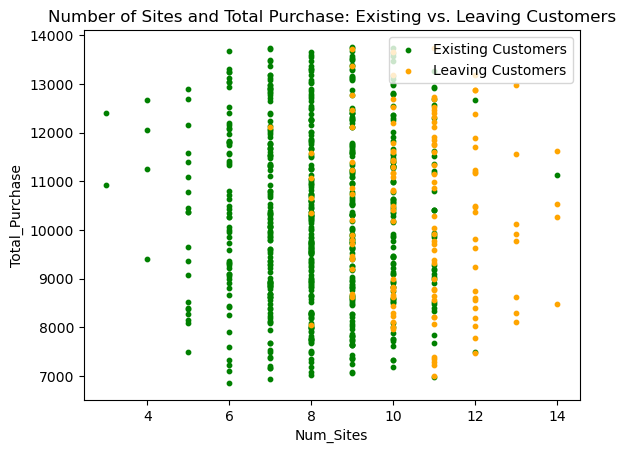

In [164]:
# Plot comparing the number of sites from existing vs. leaving customers
plot = plt.scatter(existing_customers['Num_Sites'], existing_customers['Total_Purchase'], s= 10, color='green', label='Existing Customers')
plot = plt.scatter(leaving_customers['Num_Sites'], leaving_customers['Total_Purchase'], s= 10, color='orange', label='Leaving Customers')


plt.title('Number of Sites and Total Purchase: Existing vs. Leaving Customers')
plt.xlabel('Num_Sites')
plt.ylabel('Total_Purchase')

plt.legend()
plt.show(plot)

In [180]:
loyal_customers = existing_customers[existing_customers['Num_Sites'] >=11]
loyal_customers.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,41.485714,10183.992286,0.342857,5.485714,11.142857,0.0
std,5.766901,1765.684269,0.481594,1.421917,0.550019,0.0
min,28.000000,6977.560000,0.000000,3.000000,11.000000,0.0
25%,37.500000,8953.765000,0.000000,4.000000,11.000000,0.0
50%,40.000000,9940.760000,0.000000,5.000000,11.000000,0.0
75%,46.000000,11440.070000,1.000000,6.000000,11.000000,0.0
max,55.000000,13268.550000,1.000000,9.000000,14.000000,0.0


In [189]:
# Remove outlier
df = df.drop(df[(df['Churn'] == 0) & (df['Num_Sites'] > 13)].index)

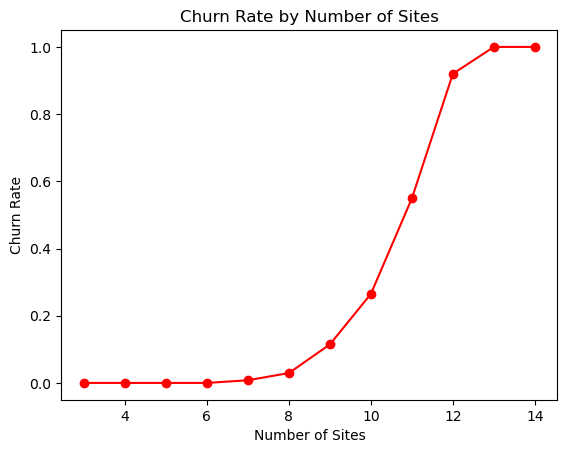

In [190]:
# Further plotting the Number of Sites infulance on customer churn rate: group by Num_Sites and calculate the mean churn rate for each group
churn_mean_group = df.groupby('Num_Sites')['Churn'].mean().reset_index()

# Create the scatter plot
rate = plt.plot(churn_mean_group['Num_Sites'], churn_mean_group['Churn'], color='red', marker = 'o')

# Set the title and axis labels
plt.title('Churn Rate by Number of Sites')
plt.xlabel('Number of Sites')
plt.ylabel('Churn Rate')

# Show the plot
plt.show(rate)

<p> We were able to identify the churn rate of our customers: 16.9% and got an insight that the higher Number of Sites has a positive correlation to the higher churn rate. The business should look into how these accounts are being managed. A further analysis of a 'loyal_customer' satisfactury data set would contribute to scope planning for higher custumer retention </p>